In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"
from scipy import stats

In [168]:
df=pd.read_csv('Sales.csv')

In [170]:
df.head(3)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [174]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [176]:
df['Date']=pd.to_datetime(df['Date'])

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [180]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [182]:
df.shape

(7560, 6)

### Perform descriptive statistical analysis on the data (Sales and Unit columns). (Techniques such as mean, median, mode and standard deviation can be used.). 

In [185]:
df[['Sales', 'Unit']].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [187]:
sales_mean = df['Sales'].mean()
unit_mean=df['Unit'].mean()

sales_median = df['Sales'].median()
unit_median=df['Unit'].median()

sales_mode = df['Sales'].mode()
unit_mode=df['Unit'].mode()

sales_std=df['Sales'].std()
unit_std=df['Unit'].std()

print('Sales Mean: ', sales_mean)
print('Unit Mean: ', unit_mean)
print('Sales Median: ',sales_median)
print('Unit Median ',unit_median)
print('Sales Mode: ',sales_mode)
print('Sales Mode: ',sales_mode)
print('Sales Std Dev: ',sales_std)
print('Unit Std Dev: ',unit_std)

Sales Mean:  45013.5582010582
Unit Mean:  18.00542328042328
Sales Median:  35000.0
Unit Median  14.0
Sales Mode:  0    22500
Name: Sales, dtype: int64
Sales Mode:  0    22500
Name: Sales, dtype: int64
Sales Std Dev:  32253.506943966317
Unit Std Dev:  12.901402777586458


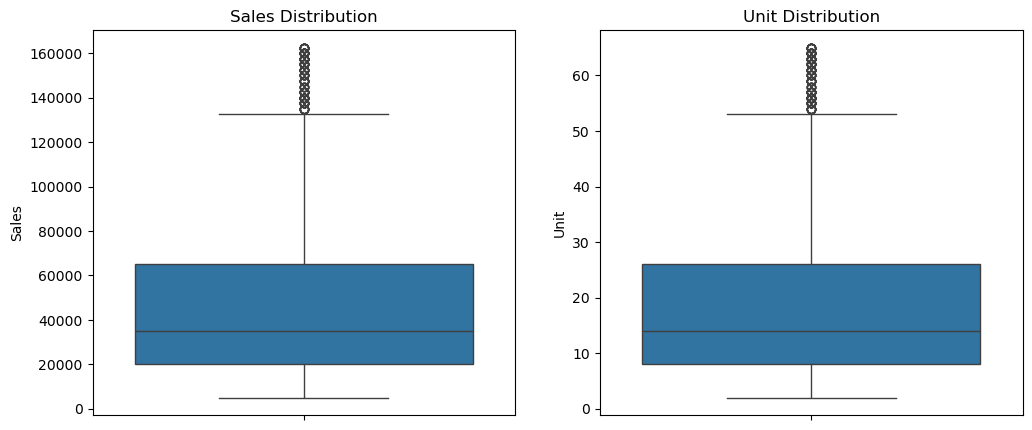

In [189]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Sales'])
plt.title('Sales Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=df['Unit'])
plt.title('Unit Distribution')

plt.show()

### Determine which group is generating the highest sales, and which group is generating the lowest sales

In [192]:
sales_by_group=df.groupby('Group')['Sales'].sum().reset_index()

In [194]:
sales_by_group

,Group,Sales
0,Kids,85072500
1,Men,85750000
2,Seniors,84037500
3,Women,85442500


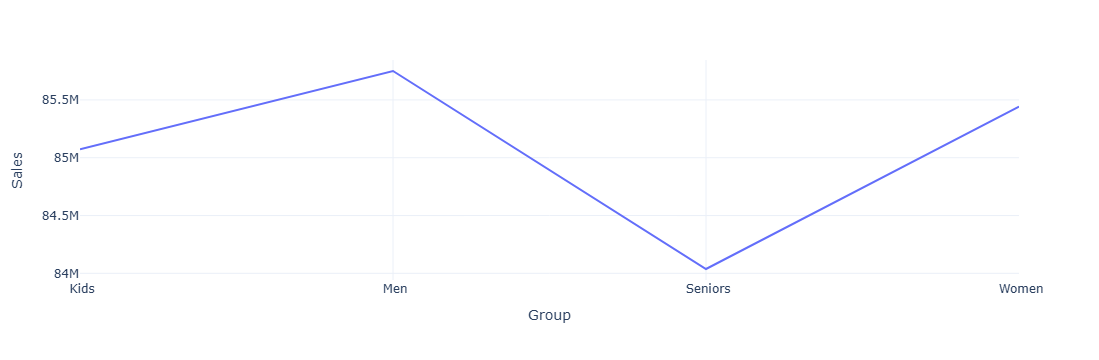

In [196]:
fig=px.line(sales_by_group,
            x='Group',
            y='Sales'
)
fig.show()

## Conlusion - Group - Men has highest sales and Group - Seniors has lowest sales.

In [199]:
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

In [201]:
sales_by_state

,State,Sales
0,NSW,74970000
1,NT,22580000
2,QLD,33417500
3,SA,58857500
4,TAS,22760000
5,VIC,105565000
6,WA,22152500


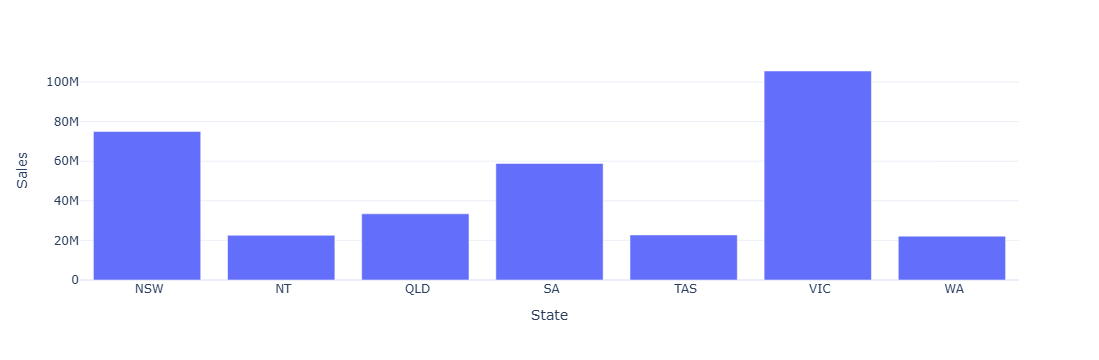

In [203]:
fig=px.bar(sales_by_state,
            x='State',
            y='Sales'
)
fig.show()

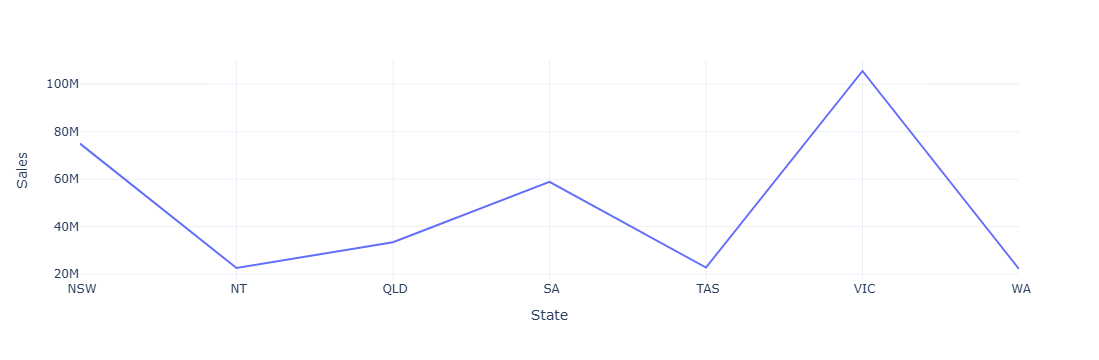

In [205]:
fig=px.line(sales_by_state,
            x='State',
            y='Sales'
)
fig.show()

### Conclusion - State - VIC has highest sales & Sate - WA has lowest sales

In [208]:
df.set_index('Date', inplace=True)

In [210]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


#### Generate Weekly Report

In [213]:
weekly_report = df.resample('W').agg({
    'Sales': ['sum', 'mean', 'median', 'std', 'min', 'max']
})
weekly_report.columns = ['Total_Sales', 'Avg_Sales', 'Median_Sales', 'Std_Dev', 'Min_Sales', 'Max_Sales']

print("\nWeekly Sales Report:")
print(weekly_report.head())


Weekly Sales Report:
            Total_Sales     Avg_Sales  Median_Sales       Std_Dev  Min_Sales  \
Date                                                                           
2020-10-04     15045000  44776.785714       35000.0  29293.076913       7500   
2020-10-11     27002500  45922.619048       37500.0  29930.519460       7500   
2020-10-18     26640000  45306.122449       35000.0  29928.788223       7500   
2020-10-25     26815000  45603.741497       35000.0  29851.225988       7500   
2020-11-01     21807500  43268.849206       32500.0  29887.407035       5000   

            Max_Sales  
Date                   
2020-10-04     125000  
2020-10-11     125000  
2020-10-18     125000  
2020-10-25     125000  
2020-11-01     125000  


### Generate Monthly Report

In [216]:
monthly_report = df.resample('ME').agg({
    'Sales': ['sum', 'mean', 'median', 'std', 'min', 'max']
})
monthly_report.columns = ['Total_Sales', 'Avg_Sales', 'Median_Sales', 'Std_Dev', 'Min_Sales', 'Max_Sales']

print("\nMonthly Sales Report:")
print(monthly_report.head())


Monthly Sales Report:
            Total_Sales     Avg_Sales  Median_Sales       Std_Dev  Min_Sales  \
Date                                                                           
2020-10-31    114290000  45353.174603       35000.0  29861.302213       7500   
2020-11-30     90682500  35985.119048       25000.0  27366.175823       5000   
2020-12-31    135330000  53702.380952       37500.0  36385.451298      12500   

            Max_Sales  
Date                   
2020-10-31     125000  
2020-11-30     112500  
2020-12-31     162500  


### Generate Quarterly Report

In [219]:
quarterly_report = df.resample('QE').agg({
    'Sales': ['sum', 'mean', 'median', 'std', 'min', 'max']
})
quarterly_report.columns = ['Total_Sales', 'Avg_Sales', 'Median_Sales', 'Std_Dev', 'Min_Sales', 'Max_Sales']

print("\nQuarterly Sales Report:")
print(quarterly_report.head())


Quarterly Sales Report:
            Total_Sales     Avg_Sales  Median_Sales       Std_Dev  Min_Sales  \
Date                                                                           
2020-12-31    340302500  45013.558201       35000.0  32253.506944       5000   

            Max_Sales  
Date                   
2020-12-31     162500  


### Optional: Statistical Insights (using SciPy)

In [222]:
# Example: Monthly trend analysis
monthly_sales = monthly_report['Total_Sales']

slope, intercept, r_value, p_value, std_err = stats.linregress(
    range(len(monthly_sales)), monthly_sales
)

print("\n📉 Monthly Sales Trend Analysis:")
print(f"Slope: {slope:.2f}")
print(f"Correlation (R): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")


📉 Monthly Sales Trend Analysis:
Slope: 10520000.00
Correlation (R): 0.47
P-value: 0.6878


In [224]:
weekly_report.to_csv('weekly_sales_report.csv')
monthly_report.to_csv('monthly_sales_report.csv')
quarterly_report.to_csv('quarterly_sales_report.csv')

## Data Visualization

### State-wise sales analysis for different groups (kids, women, men, and seniors)

In [228]:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
print(state_group_sales.head())

  State     Group     Sales
0   NSW      Kids  18587500
1   NSW       Men  19022500
2   NSW   Seniors  18187500
3   NSW     Women  19172500
4    NT      Kids   5700000


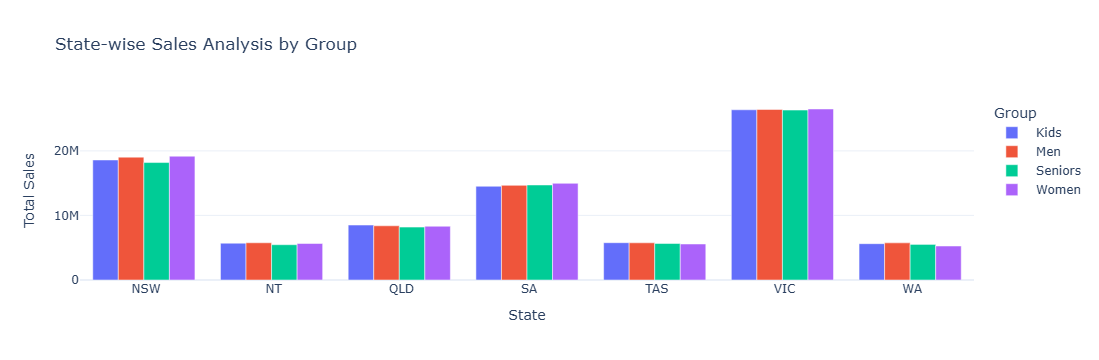

In [230]:
fig = px.bar(
    state_group_sales,
    x='State',
    y='Sales',
    color='Group',
    barmode='group',
    title='State-wise Sales Analysis by Group',
    labels={'Sales': 'Total Sales', 'State': 'State'}
)
fig.show()

### Group-wise sales analysis (kids, women, men, and seniors) across different states.

In [233]:
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
print(group_state_sales.head())

   Group State     Sales
0   Kids   NSW  18587500
1   Kids    NT   5700000
2   Kids   QLD   8510000
3   Kids    SA  14515000
4   Kids   TAS   5775000


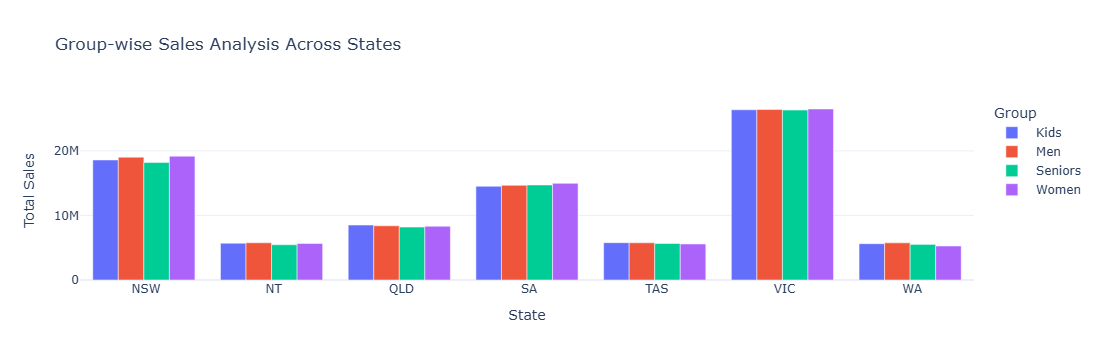

In [235]:
fig = px.bar(
    group_state_sales,
    x='State',
    y='Sales',
    color='Group',
    barmode='group',
    title='Group-wise Sales Analysis Across States',
    labels={'Sales':'Total Sales', 'State':'State'}
)
fig.show()

### Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&Mteams design programs for increasing sales such as hyperpersonalization and Next Best Offers].

In [238]:
print(df.columns)

Index(['Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [240]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


C:\Users\singh\AppData\Local\Temp\ipykernel_13096\3708589199.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

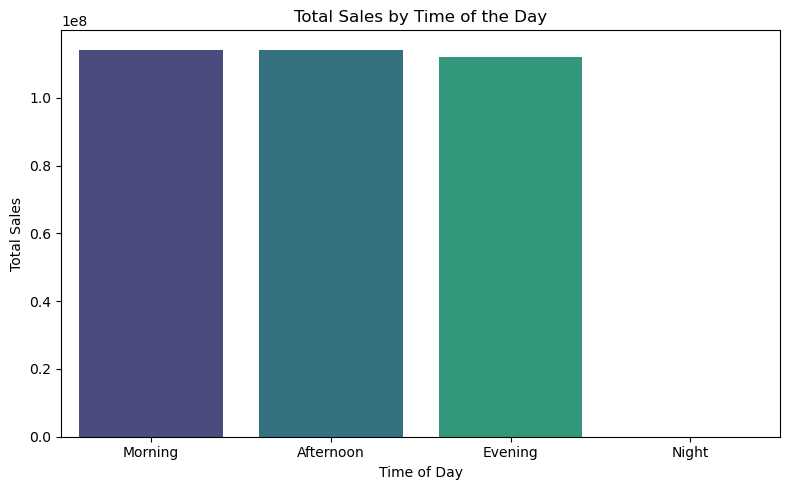

🟢 Highest Sales occur during: Morning
🔴 Lowest Sales occur during: Evening


In [262]:
# Clean whitespace in column names and values
df.columns = df.columns.str.strip()
df['Time'] = df['Time'].str.strip()

# Group by Time and calculate total Sales
time_of_day_sales = df.groupby('Time', as_index=False)['Sales'].sum()

# Sort Time column in logical order
order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_sales['Time'] = pd.Categorical(time_of_day_sales['Time'], categories=order, ordered=True)
time_of_day_sales = time_of_day_sales.sort_values('Time')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=time_of_day_sales, x='Time', y='Sales', palette='viridis')
plt.title('Total Sales by Time of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Highest & Lowest time of day
if not time_of_day_sales.empty:
    max_time = time_of_day_sales.loc[time_of_day_sales['Sales'].idxmax(), 'Time']
    min_time = time_of_day_sales.loc[time_of_day_sales['Sales'].idxmin(), 'Time']

    print(f"🟢 Highest Sales occur during: {max_time}")
    print(f"🔴 Lowest Sales occur during: {min_time}")
else:
    print("⚠️ No valid data found for 'Time' column after cleaning.")

### Conclusion - Morning sales are high and Evening sales are low.

# This notebook demonstrates the full lifecycle of a data analysis project in JupyterLab — from data cleaning to visualization — providing actionable business insights. The integrated visuals and interpretations help the Head of S&M make informed, data-backed decisions.